# House Prices: Advanced Regression Techniques

A Kaggle competition on predicting sales prices and practice feature engineering, regression techniques such as random forests, and gradient boosting 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [1]:
# Scoring function
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

## 1- Load libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2- Import and preprocess data

In [78]:
data_df = pd.read_csv('data/train.csv')
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
data_df.shape

(1460, 81)

In [6]:
data_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test_df.shape

(1459, 80)

## 3- Build something quick and dirty as a baseline model

In [8]:
columns = list(data_df.select_dtypes(include=['int64', 'float64']).columns)
columns.remove('SalePrice')

In [9]:
X = data_df[columns].copy()
X.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [10]:
X['LotFrontage'].fillna(X['LotFrontage'].median(), inplace=True)
X['GarageYrBlt'].fillna(X['GarageYrBlt'].median(), inplace=True)
X['MasVnrArea'].fillna(X['MasVnrArea'].mean(), inplace=True)

# Check if there is still any missing values
X.isnull().sum().sum()

0

In [11]:
y = data_df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [12]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
# Now train a quick model
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X_scaled, y, random_state=0)

print('Number of examples in the traning set:', X_train.shape[0])
print('Number of examples in the development set:', X_dev.shape[0])

Number of examples in the traning set: 1095
Number of examples in the development set: 365


In [14]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X_train, y_train)
print('R2 score on the train set: ', LR.score(X_train, y_train))
print('R2 score on the dev set: ', LR.score(X_dev, y_dev))
print('Mean squared error on the train set', rmsle(LR.predict(X_train), y_train))
print('Mean squared error on the dev set', rmsle(LR.predict(X_dev), y_dev))

R2 score on the train set:  0.8449554270569105
R2 score on the dev set:  0.6801233629810874
Mean squared error on the train set 0.18592729324938925
Mean squared error on the dev set 0.20022687231720146


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(loss='ls', learning_rate=0.5, n_estimators=10, max_depth=3, random_state=0).fit(X_train, y_train)
print('R2 score on the train set: ', GBR.score(X_train, y_train))
print('R2 score on the dev set: ', GBR.score(X_dev, y_dev))
print('Mean squared error on the train set', rmsle(GBR.predict(X_train), y_train))
print('Mean squared error on the dev set', rmsle(GBR.predict(X_dev), y_dev))

R2 score on the train set:  0.9333336681705634
R2 score on the dev set:  0.864436193808348
Mean squared error on the train set 0.127042641007794
Mean squared error on the dev set 0.15070166357808137


In [16]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=10, max_features=10, random_state=0).fit(X_train, y_train)
print('R2 score on the train set: ', RFR.score(X_train, y_train))
print('R2 score on the dev set: ', RFR.score(X_dev, y_dev))
print('Mean squared error on the train set', rmsle(RFR.predict(X_train), y_train))
print('Mean squared error on the dev set', rmsle(RFR.predict(X_dev), y_dev))

R2 score on the train set:  0.9609503497710953
R2 score on the dev set:  0.8039680588423219
Mean squared error on the train set 0.07784395754890554
Mean squared error on the dev set 0.15027740860870198


All methods appear to be overfitting badly. Now what will happen if I just submit this nobrainer model?

### Check CV score from GBRegressor

In [17]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(GBR, X, y, cv=5)
print('Cross validation scores for GBR model:', cv_score.mean())

Cross validation scores for GBR model: 0.8498252237537672


Try submitting the solution with GradientBoostingRegressor



In [18]:
X_test = test_df[columns].copy()
X_test['LotFrontage'].fillna(X_test['LotFrontage'].median(), inplace=True)
X_test['GarageYrBlt'].fillna(X_test['GarageYrBlt'].median(), inplace=True)
X_test['MasVnrArea'].fillna(X_test['MasVnrArea'].mean(), inplace=True)
X_test['BsmtFinSF1'].fillna(X_test['BsmtFinSF1'].mean(), inplace=True)
X_test['BsmtFinSF2'].fillna(X_test['BsmtFinSF2'].mean(), inplace=True)
X_test['BsmtUnfSF'].fillna(X_test['BsmtUnfSF'].mean(), inplace=True)
X_test['TotalBsmtSF'].fillna(X_test['TotalBsmtSF'].mean(), inplace=True)
X_test['BsmtFullBath'].fillna(X_test['BsmtFullBath'].mean(), inplace=True)
X_test['BsmtHalfBath'].fillna(X_test['BsmtHalfBath'].mean(), inplace=True)
X_test['GarageCars'].fillna(X_test['GarageCars'].mean(), inplace=True)
X_test['GarageArea'].fillna(X_test['GarageArea'].mean(), inplace=True)

X_test.isnull().sum().sum()

0

In [19]:
X_test_scaled = scaler.transform(X_test)

In [20]:
y_pred = GBR.predict(X_test_scaled)
answer = pd.DataFrame(data=y_pred, columns=['SalePrice'])
answer.insert(loc=0, column='Id', value=test_df['Id'])

answer.to_csv('data/submission.csv', index=False)

This results in an abysmal score, as expected, of 0.24740, which put me in position 89%. Yucky! Now, let's try a more serious job.

Before we go into the next (and much needed) step, however, let's check out another model that's supposed to be an improvement on GBRegressor.

In [26]:
import xgboost
from xgboost.sklearn import XGBRegressor
XGBR =  XGBRegressor(loss='ls', learning_rate=0.5, n_estimators=10, max_depth=3, random_state=0).fit(X_train, y_train)
print('R2 score on the train set: ', XGBR.score(X_train, y_train))
print('R2 score on the dev set: ', XGBR.score(X_dev, y_dev))
print('Mean squared error on the train set', rmsle(XGBR.predict(X_train), y_train))
print('Mean squared error on the dev set', rmsle(XGBR.predict(X_dev), y_dev))

R2 score on the train set:  0.9291897938997669
R2 score on the dev set:  0.7692448534308661
Mean squared error on the train set 0.12963633608959615
Mean squared error on the dev set 0.15829616475397237


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


I don't really see much of an improvement here. However, note that:
* All models appear to overfit
* Because all these models are initialized with a random seed, for best competition performance, running the same models a number of times using different seeds and averaging over the results would be advised.

## 4- Exploratory Data Analysis

Below is the list of features given and their descriptions from Kaggle for reference.

Data fields

Here's a brief version of what you'll find in the data description file.

*  SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
*  MSSubClass: The building class
*  MSZoning: The general zoning classification
*  LotFrontage: Linear feet of street connected to property
*  LotArea: Lot size in square feet
*  Street: Type of road access
*  Alley: Type of alley access
*  LotShape: General shape of property
*  LandContour: Flatness of the property
*  Utilities: Type of utilities available
*  LotConfig: Lot configuration
*  LandSlope: Slope of property
*  Neighborhood: Physical locations within Ames city limits
*  Condition1: Proximity to main road or railroad
*  Condition2: Proximity to main road or railroad (if a second is present)
*  BldgType: Type of dwelling
*  HouseStyle: Style of dwelling
*  OverallQual: Overall material and finish quality
*  OverallCond: Overall condition rating
*  YearBuilt: Original construction date
*  YearRemodAdd: Remodel date
*  RoofStyle: Type of roof
*  RoofMatl: Roof material
*  Exterior1st: Exterior covering on house
*  Exterior2nd: Exterior covering on house (if more than one material)
*  MasVnrType: Masonry veneer type
*  MasVnrArea: Masonry veneer area in square feet
*  ExterQual: Exterior material quality
*  ExterCond: Present condition of the material on the exterior
*  Foundation: Type of foundation
*  BsmtQual: Height of the basement
*  BsmtCond: General condition of the basement
*  BsmtExposure: Walkout or garden level basement walls
*  BsmtFinType1: Quality of basement finished area
*  BsmtFinSF1: Type 1 finished square feet
*  BsmtFinType2: Quality of second finished area (if present)
*  BsmtFinSF2: Type 2 finished square feet
*  BsmtUnfSF: Unfinished square feet of basement area
*  TotalBsmtSF: Total square feet of basement area
*  Heating: Type of heating
*  HeatingQC: Heating quality and condition
*  CentralAir: Central air conditioning
*  Electrical: Electrical system
*  1stFlrSF: First Floor square feet
*  2ndFlrSF: Second floor square feet
*  LowQualFinSF: Low quality finished square feet (all floors)
*  GrLivArea: Above grade (ground) living area square feet
*  BsmtFullBath: Basement full bathrooms
*  BsmtHalfBath: Basement half bathrooms
*  FullBath: Full bathrooms above grade
*  HalfBath: Half baths above grade
*  Bedroom: Number of bedrooms above basement level
*  Kitchen: Number of kitchens
*  KitchenQual: Kitchen quality
*  TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*  Functional: Home functionality rating
*  Fireplaces: Number of fireplaces
*  FireplaceQu: Fireplace quality
*  GarageType: Garage location
*  GarageYrBlt: Year garage was built
*  GarageFinish: Interior finish of the garage
*  GarageCars: Size of garage in car capacity
*  GarageArea: Size of garage in square feet
*  GarageQual: Garage quality
*  GarageCond: Garage condition
*  PavedDrive: Paved driveway
*  WoodDeckSF: Wood deck area in square feet
*  OpenPorchSF: Open porch area in square feet
*  EnclosedPorch: Enclosed porch area in square feet
*  3SsnPorch: Three season porch area in square feet
*  ScreenPorch: Screen porch area in square feet
*  PoolArea: Pool area in square feet
*  PoolQC: Pool quality
*  Fence: Fence quality
*  MiscFeature: Miscellaneous feature not covered in other categories
*  MiscVal: $Value of miscellaneous feature
*  MoSold: Month Sold
*  YrSold: Year Sold
*  SaleType: Type of sale
*  SaleCondition: Condition of sale

First, let's have a look at the range of sale prices, mean, median, as well as the heatmap plot to see how features are correlated.



In [28]:
# Range of housing prices
(data_df['SalePrice'].min(), data_df['SalePrice'].max())

(34900, 755000)

In [30]:
# mean price
data_df['SalePrice'].mean()

180921.19589041095

In [31]:
# median price
data_df['SalePrice'].median()

163000.0

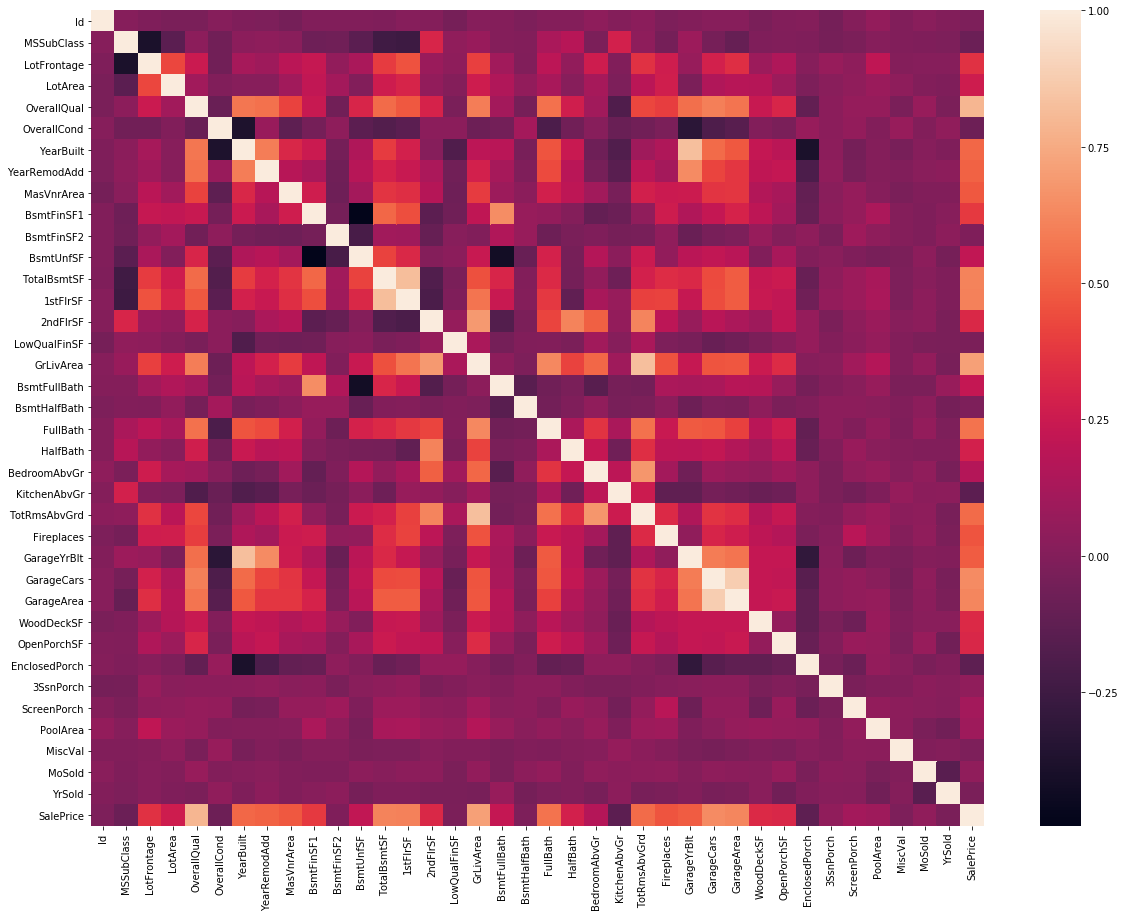

In [94]:
#Heatmap plot
plt.subplots(figsize=(20,15))
sns.heatmap(data=data_df.corr())

We can see at a glance that SalePrice is correlated more strongly to a number of features such as:
* OverallQual (Most strongly correlated)
* YearBuilt
* YearRemodAdd
* MasVnrArea
* TotalBsmtSF
* 1stFlrSF
* GrLivArea (2nd most strongly correlated)
* FullBath
* TotRmsAbvGrd
* GarageCars
* GarageArea

I note that some features that I personally think are important don't show up in the map:
* LotArea
* LotFrontage 

LotFrontage has 259 values missing so that may be why.

Let's have a look at the scatter plot LotArea vs. SalePrice.

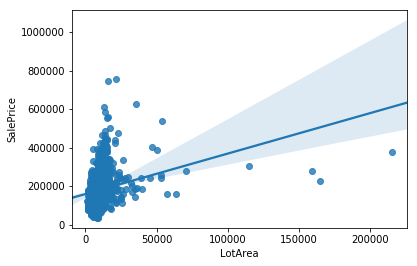

In [74]:
sns.regplot(data_df['LotArea'], data_df['SalePrice'])

There indeed doesn't seem to be as clear a correlation, and some very obvious outliers are observed.

In [82]:
data_df['LotArea'].min()

1300

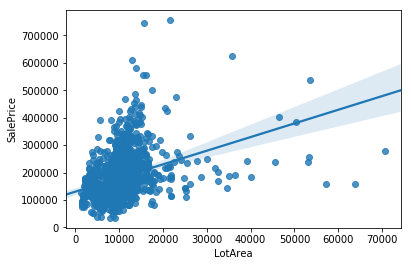

In [85]:
temp = data_df[data_df['LotArea'] < 100000]
sns.regplot(temp['LotArea'], temp['SalePrice'])

Let's fill in the missing values for LotFrontage with the median. I think we can fill in the missing values with the mean, but median is slightly better in my opinion in case of a skewed distribution. 

In [34]:
data_df['LotFrontage'].mean()

69.86369863013698

In [35]:
data_df['LotFrontage'].median()

69.0

It turns out to not matter in this case weather we choose the mean or the median anyway.

In [38]:
data_df['LotFrontage'].fillna(data_df['LotFrontage'].median(), inplace=True)

Let's have a look at the distribution of LotFrontage.

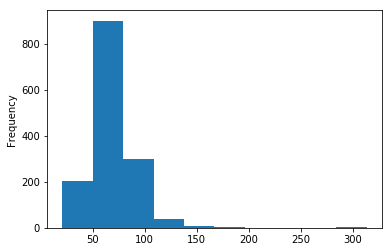

In [39]:
data_df['LotFrontage'].plot.hist()

Let's create a list with features that I plan to include in our model based on the heatmap and also the what I thought should be important such as LotFrontage and LotArea.

In [40]:
columns = ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF','1stFlrSF',
           'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
           'LotFrontage', 'LotArea']

Check if there are any missing values:

In [41]:
data_df[columns].isnull().sum()

YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
LotFrontage     0
LotArea         0
dtype: int64

MasVnrArea has 8 missing values. This feature describes the masonry veneer area in square feet and so it may be OK to fill in the missing values with the mean or the median. However, looking at the actual mean and  median, it shows that the data are very skewed and need a second look. This is an example showing that it's safer to go with the median, and not the mean. I go with the median, which is a reasonable choice looking at the distribution plot.

In [43]:
data_df['MasVnrArea'].mean()

103.68526170798899

In [44]:
data_df['MasVnrArea'].median()

0.0

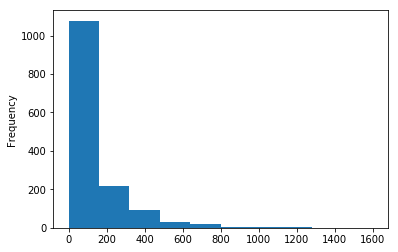

In [45]:
data_df['MasVnrArea'].plot.hist()

In [47]:
data_df['MasVnrArea'].fillna(0, inplace=True)

Let's have a look at OverallQual.

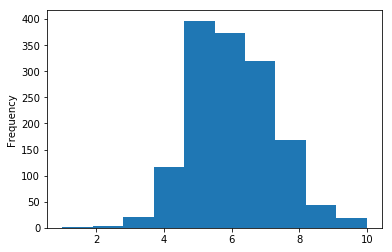

In [29]:
data_df['OverallQual'].plot.hist()

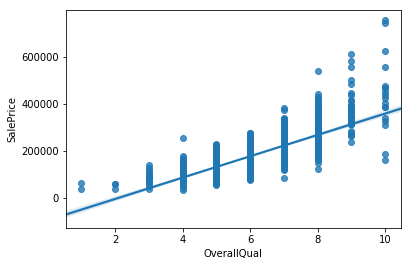

In [62]:
sns.regplot(data_df['OverallQual'], data_df['SalePrice'])

This is not very surprising that houses with higher overall quality get sold for higher prices. The distribution also looks very normal. However, note that the price range is quite large still given a particular value of OverallQual, especially for the highest quality OverallQual=10.

Now let's look at YearBuilt.

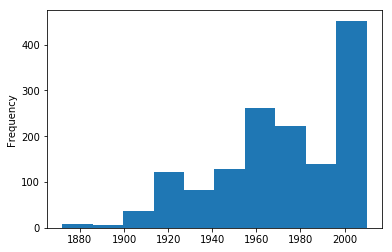

In [48]:
data_df['YearBuilt'].plot.hist()

It appears that more houses are built recently.

In [57]:
(data_df['YearBuilt'].min(), data_df['YearBuilt'].max())

(1872, 2010)

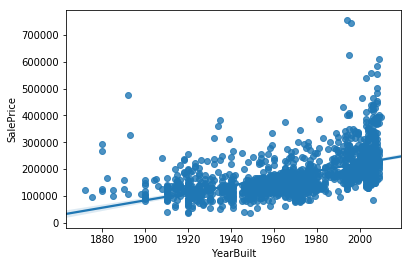

In [61]:
sns.regplot(data_df['YearBuilt'], data_df['SalePrice'])

There appears to be a week trend of increasing sale prices with how recent the house is. However, besides the normal variations, there appear to be some outliers.

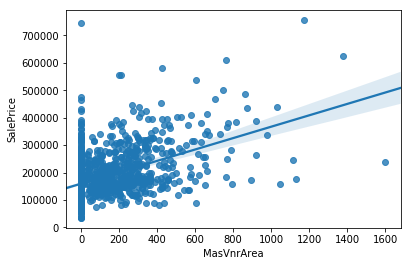

In [64]:
sns.regplot(data_df['MasVnrArea'], data_df['SalePrice'])

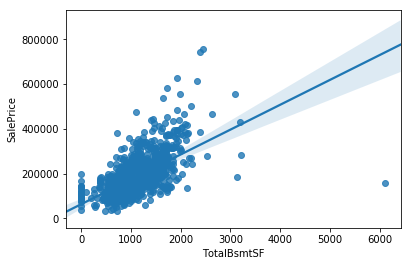

In [65]:
sns.regplot(data_df['TotalBsmtSF'], data_df['SalePrice'])

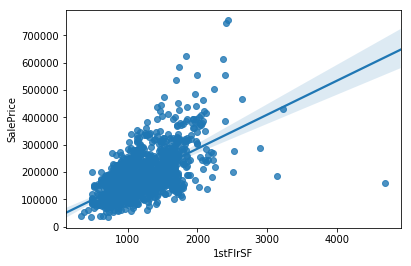

In [66]:
sns.regplot(data_df['1stFlrSF'], data_df['SalePrice'])

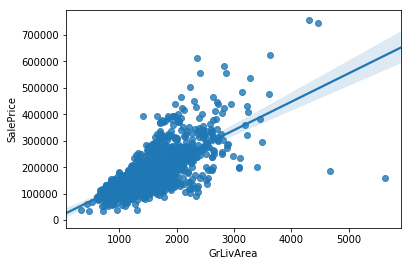

In [67]:
sns.regplot(data_df['GrLivArea'], data_df['SalePrice'])

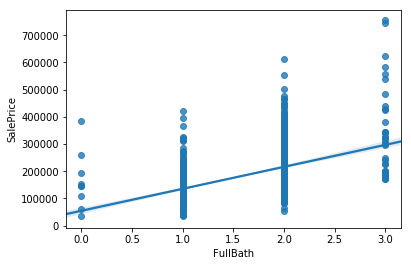

In [68]:
sns.regplot(data_df['FullBath'], data_df['SalePrice'])

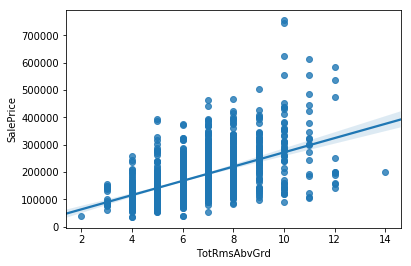

In [69]:
sns.regplot(data_df['TotRmsAbvGrd'], data_df['SalePrice'])

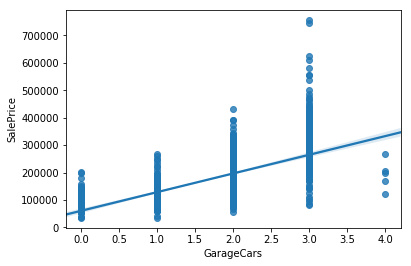

In [71]:
sns.regplot(data_df['GarageCars'], data_df['SalePrice'])

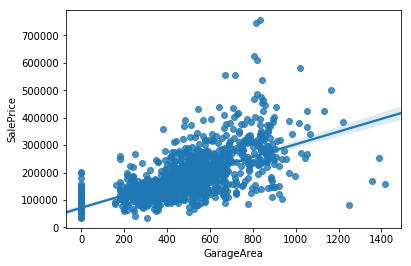

In [72]:
sns.regplot(data_df['GarageArea'], data_df['SalePrice'])

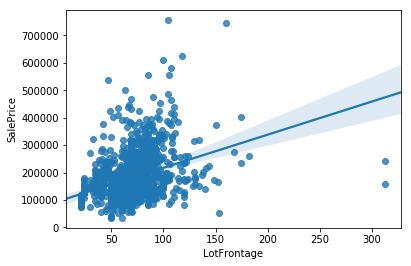

In [73]:
sns.regplot(data_df['LotFrontage'], data_df['SalePrice'])

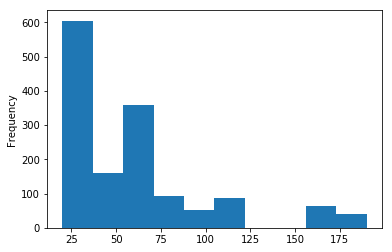

In [41]:
data_df['MSSubClass'].plot.hist()

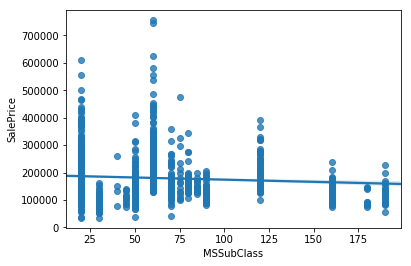

In [86]:
sns.regplot(data_df['MSSubClass'], data_df['SalePrice'])

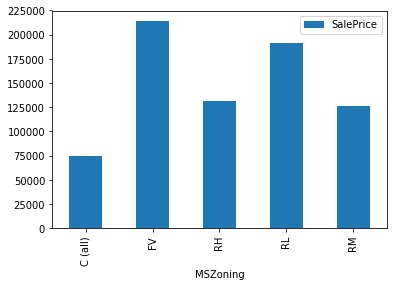

In [88]:
data_df[['MSZoning', 'SalePrice']].groupby(['MSZoning']).mean().plot(kind='bar')

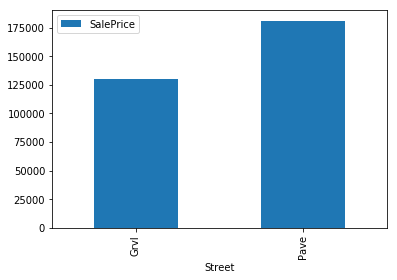

In [92]:
data_df[['Street', 'SalePrice']].groupby(['Street']).mean().plot(kind='bar')

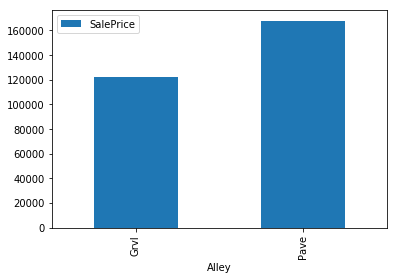

In [25]:
data_df[['Alley', 'SalePrice']].groupby(['Alley']).mean().plot(kind='bar')

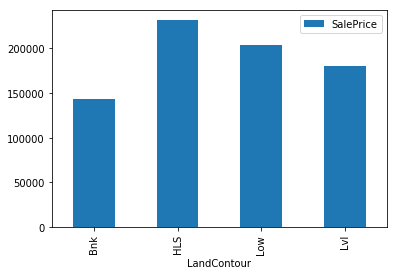

In [36]:
data_df[['LandContour', 'SalePrice']].groupby(['LandContour']).mean().plot(kind='bar')

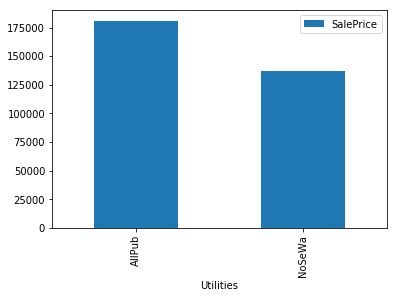

In [32]:
data_df[['Utilities', 'SalePrice']].groupby(['Utilities']).mean().plot(kind='bar')